In [3]:
#setting parameters
import random
import math
p=0.9#the threshold of probability 
N=100#number of nodes in the graph
disthres=0.12
from Connect import is_connect,find_component

In [4]:
#generating the tested graph
#the existence of the edge between any two nodes is subjected to an uniform distribution on (0,1)
a=[0]*N
b=[0]*N
for x in range(N):
    a[x]=random.uniform(0,1)
    b[x]=random.uniform(0,1)
mat=[]#adjacent matrix
for x in range(N):
	mat.append([0]*N)
for x in range(N):
	for y in range(x+1,N):
		if random.uniform(0,1)<p and math.sqrt((a[x]-a[y])**2+(b[x]-b[y])**2)<disthres:
			mat[x][y]=1
			mat[y][x]=1

In [5]:
pip install matplotlib


The following command must be run outside of the IPython shell:

    $ pip install matplotlib

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more informations on how to install packages:

    https://docs.python.org/3/installing/


The graph is not connected


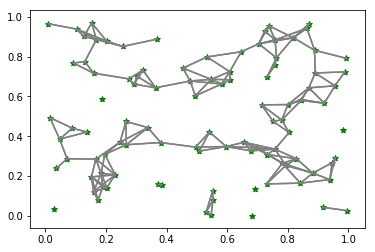

In [7]:
#test if the graph is connected
import matplotlib.pyplot as plt
plt.scatter(a,b,label="nodes",color="green",marker="*",s=30)
for x in range(N):
    for y in range(x+1,N):
        if mat[x][y]==1:
            plt.plot([a[x],a[y]],[b[x],b[y]],color="grey")
plt.scatter(a,b,label="nodes",color="green",marker="*",s=30)
for x in range(N):
    for y in range(x+1,N):
        if mat[x][y]==1:
            plt.plot([a[x],a[y]],[b[x],b[y]],color="grey")
is_connect(mat)

0,8,37,39,48,15,30,51,61,85,32,17,36,9,70,64,4,62,71,44,67,59,79,21,52,83,94,6,11,96,16,66,74,33,38,20,56,77,14,60,22,93,18,50,90,75,92,99,40,63,49,57,98,24,31,55,19,78,88,84,73,23,25,46,54,43,53,91,2,7,89,13,1,12,69,97,3,35,80,58,10,26,68,81,95,47,76
5
27,29
28,72
34
41,42,87,82
45
65
86


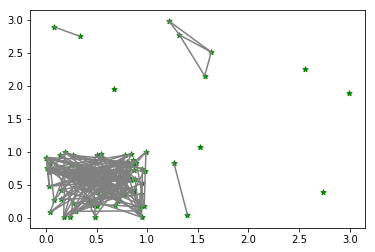

In [8]:
#find all the connected components in a graph
comp=find_component(mat)
numcomp=len(comp)
m=math.ceil(math.sqrt(numcomp))
xpos=[0]*N
ypos=[0]*N
for k in range(m):
    for r in range(m):
        ind=k*m+r
        if ind<numcomp:
            for nt in comp[ind]:
                xpos[nt]=random.uniform(k,k+1)
                ypos[nt]=random.uniform(r,r+1)
plt.scatter(xpos,ypos,label="nodes",color="green",marker="*",s=30)
for x in range(N):
    for y in range(x+1,N):
        if mat[x][y]==1:
            plt.plot([xpos[x],xpos[y]],[ypos[x],ypos[y]],cBlooolor="grey")
            

The component consisting of the nodes:

0,8,37,39,48,15,30,51,61,85,32,17,36,9,70,64,4,62,71,44,67,59,79,21,52,83,94,6,11,96,16,66,74,33,38,20,56,77,14,60,22,93,18,50,90,75,92,99,40,63,49,57,98,24,31,55,19,78,88,84,73,23,25,46,54,43,53,91,2,7,89,13,1,12,69,97,3,35,80,58,10,26,68,81,95,47,76
has a cycle consisting of the nodes:

8,37,0
The component consisting of the nodes:

5
has no cycle

The component consisting of the nodes:

27,29
has no cycle

The component consisting of the nodes:

28,72
has no cycle

The component consisting of the nodes:

34
has no cycle

The component consisting of the nodes:

41,42,87,82
has a cycle consisting of the nodes:

42,87,41
The component consisting of the nodes:

45
has no cycle

The component consisting of the nodes:

65
has no cycle

The component consisting of the nodes:

86
has no cycle



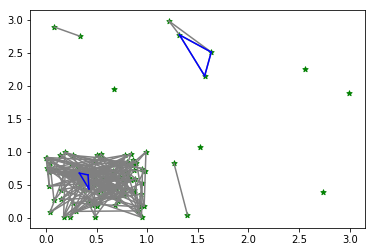

In [9]:
#find for each connected component if there is any cycle
from CycleGen import detect_cycle_gen
res=detect_cycle_gen(mat)
comp=res[0]
cmpcycle=res[1]
plt.scatter(xpos,ypos,label="nodes",color="green",marker="*",s=30)
for x in range(N):
    for y in range(x+1,N):
        if mat[x][y]==1:
            plt.plot([xpos[x],xpos[y]],[ypos[x],ypos[y]],color="grey")
for cycle in cmpcycle:
    if cycle!=[]:
        for t in range(len(cycle)-1):
            x=cycle[t]
            y=cycle[t+1]
            if mat[x][y]==1:
                plt.plot([xpos[x],xpos[y]],[ypos[x],ypos[y]],color="blue")
        x=cycle[len(cycle)-1]
        y=cycle[0]
        if mat[x][y]==1:
            plt.plot([xpos[x],xpos[y]],[ypos[x],ypos[y]],color="blue")